# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [2]:
# Combine the data into a single DataFrame
pharma_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
pharma_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = pharma_data_complete["Mouse ID"].unique()
mouse_count_total = len(mouse_count)
print(f' The number of mice in the DataFrame is: {mouse_count_total}')

 The number of mice in the DataFrame is: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Defining the DataFrame
df = pd.DataFrame(pharma_data_complete)

#Find the duplicate mouse ID
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
mouse_ID = duplicate_mice["Mouse ID"].unique()
mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data = pharma_data_complete[pharma_data_complete["Mouse ID"] == "g989"]
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_new = clean_df["Mouse ID"].nunique()
print(f' The number of mice in the clean DataFrame is: {mouse_count_new}')

 The number of mice in the clean DataFrame is: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped = clean_df.groupby("Drug Regimen")

summary_stats = grouped["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume=np.mean,
    Median_Tumor_Volume=np.median,
    Tumor_Volume_Variance=np.var,
    Tumor_Volume_Std_Dev=np.std,
    Tumor_Volume_Std_Err=st.sem)

# Removing the underscores to allign with the expected results
summary_stats.columns = summary_stats.columns.str.replace('_', ' ')

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

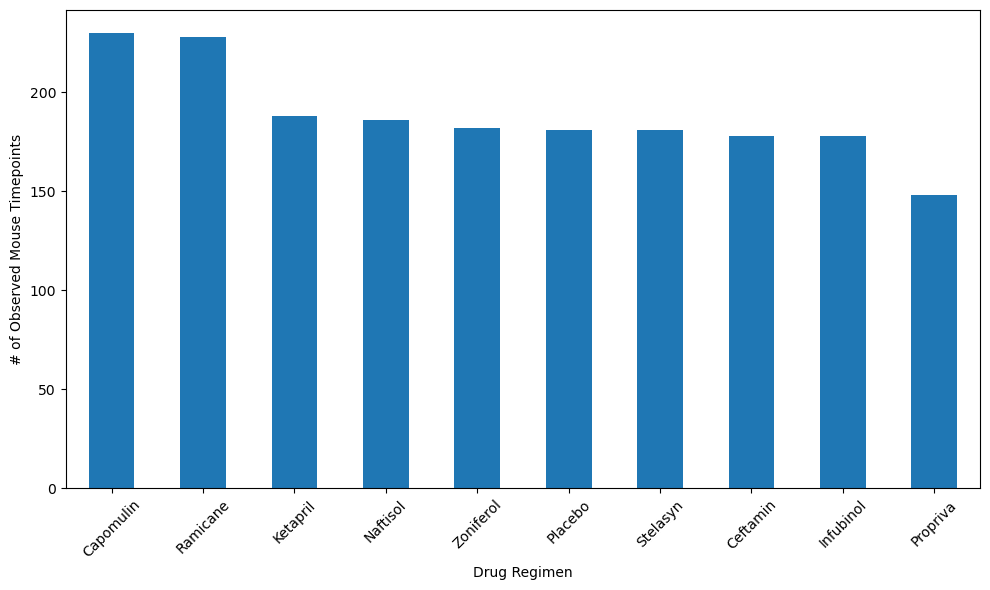

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Grouping by Drug Regimen and counting the number of rows for each regimen
drug_counts = clean_df.groupby("Drug Regimen").size()
drug_counts = drug_counts.sort_values(ascending=False)

# Creating the bar plot using Pandas
ax = drug_counts.plot(kind="bar", figsize=(10, 6))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

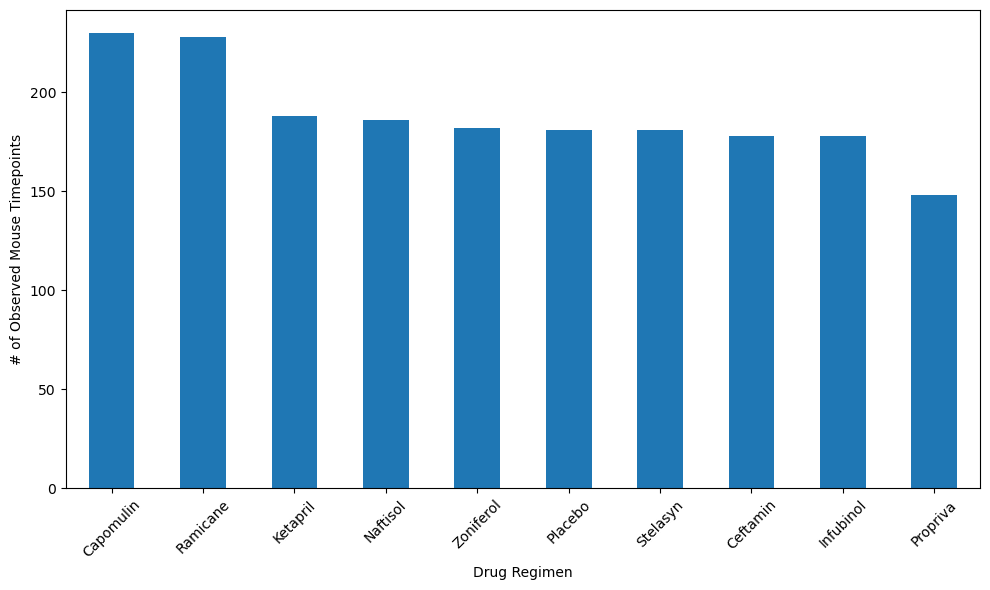

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Grouping by Drug Regimen and counting the number of rows for each regimen
drug_counts = clean_df["Mouse ID"].groupby(clean_df["Drug Regimen"]).count()
drug_counts = drug_counts.sort_values(ascending=False)
  
# Creating the bar plot using pyplot
drug_counts.plot(kind="bar", figsize=(10, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

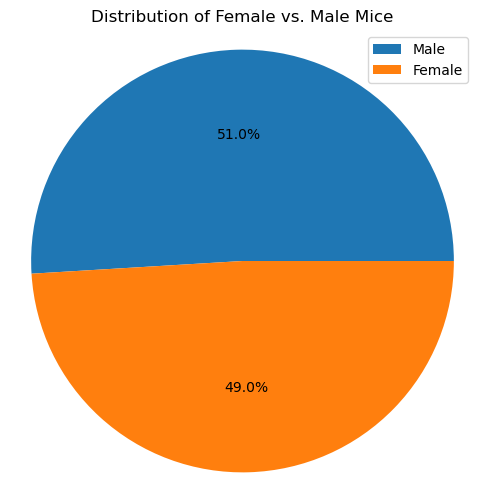

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Counting the number of male and female mice
sex_counts = clean_df["Sex"].value_counts()

# Creating a DataFrame from the counts
sex_df = pd.DataFrame(sex_counts)

# Creating the pie plot using Pandas
sex_df.plot.pie(y="Sex", autopct='%1.1f%%', labels=None, startangle=360, figsize=(6, 6))
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('') # added to remove the extra label produced automatically
plt.axis('equal')  
plt.show()

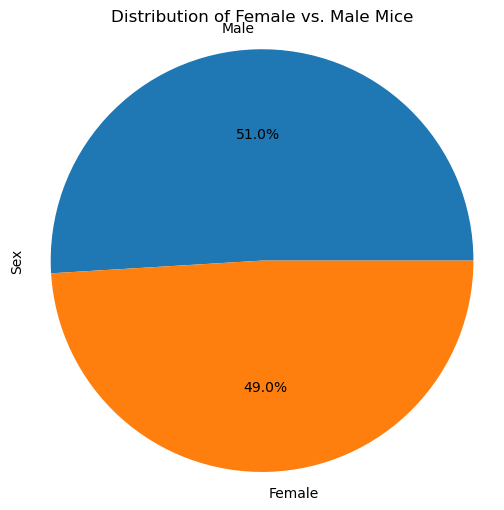

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Counting the number of male and female mice
sex_counts = clean_df["Sex"].value_counts()

# Creating a pie plot
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=360)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Grouping the data by Mouse ID
grouped_df = clean_df.groupby("Mouse ID")

# Finding the final tumor volume for each mouse
final_tumor_volume = grouped_df["Tumor Volume (mm3)"].last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, final_tumor_volume, on=["Mouse ID", "Tumor Volume (mm3)"], how="inner")

# Display the merged DataFrame
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
    
    tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # Calculating quartiles and inter quartile range 
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    tumor_volume_data.append(tumor_volume)

    # Print information about potential outliers for the current regimen
    print(f"{regimen}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



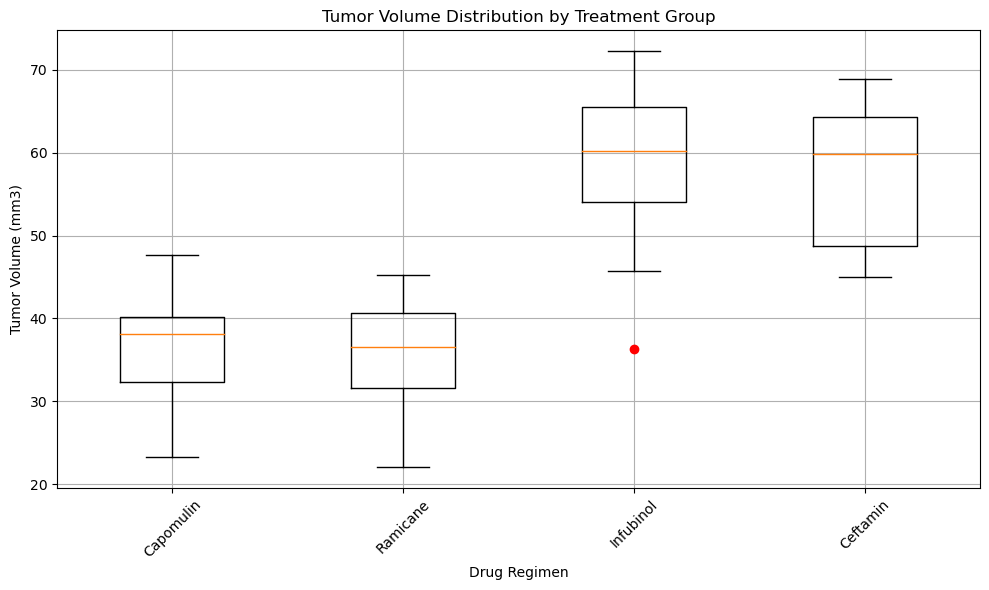

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_regimens, sym='r')  # 'sym' adds red outliers
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

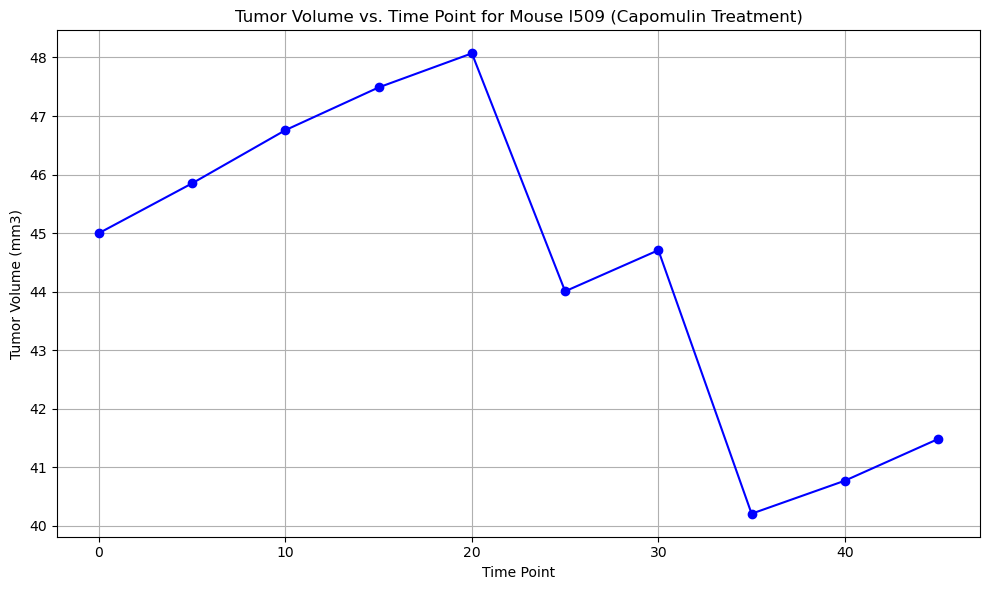

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identifed a mouse treated with Capomulin from pharma_data_complete.
capomulin_mouse_id = "l509"

# Filter the DataFrame for the specific mouse and Capomulin treatment
capomulin_data = clean_df[(clean_df["Mouse ID"] == capomulin_mouse_id) & (clean_df["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {capomulin_mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()
plt.show()

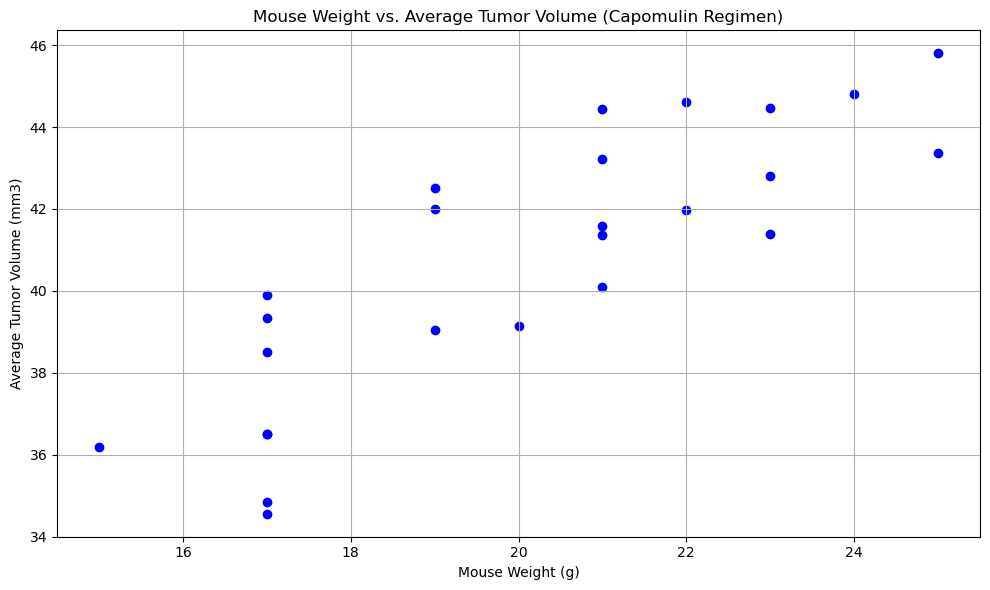

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for the Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume and mouse weight for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

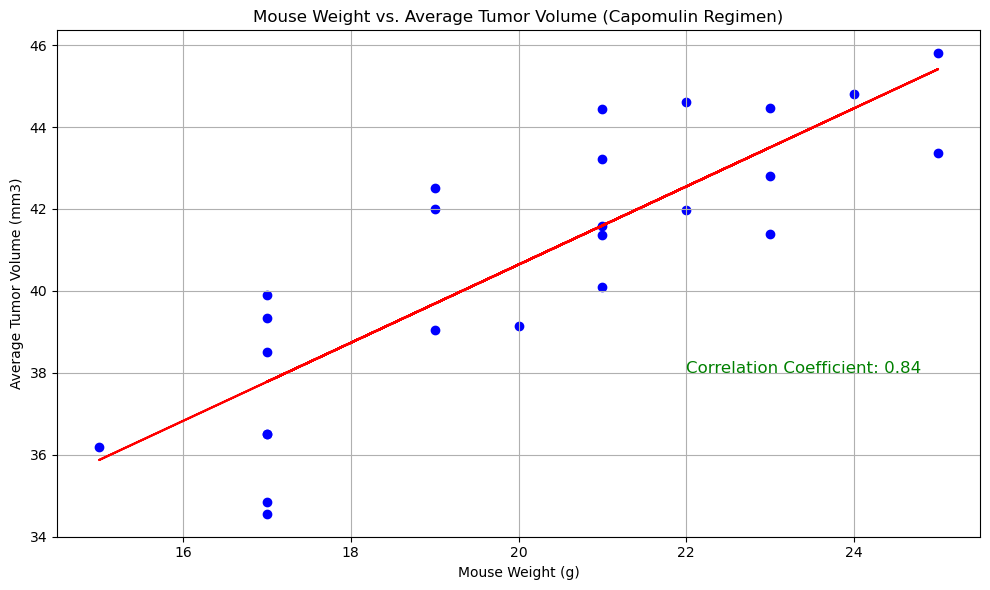

Linear Regression Results:
Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 0.0
Standard Error: 0.13


In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filtering the DataFrame for the Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Grouping the data by Mouse ID and calculate the average tumor volume and mouse weight for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculating the correlation coefficient
correlation_coefficient = round(average_tumor_volume.corr(mouse_weight), 2)

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Creating the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Adding the regression line to the plot
regress_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regress_values, color="red")

# Displaying the correlation coefficient on the plot
plt.text(22, 38, f"Correlation Coefficient: {correlation_coefficient}", fontsize=12, color="green")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the linear regression results
print(f"Linear Regression Results:")
print(f"Slope: {round(slope, 2)}")
print(f"Intercept: {round(intercept, 2)}")
print(f"R-squared: {round(r_value**2, 2)}")
print(f"P-value: {round(p_value, 2)}")
print(f"Standard Error: {round(std_err, 2)}")